In [3]:
# import necesary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

# for data visualization

import seaborn as sns
import matplotlib.pyplot as plt

##  Let Load the data 

In [4]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Unicorn Companies Dataset\Unicorn_Companies.csv", encoding='utf-8') 
df.head()


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


###### Now we have the company name, their current valuation, on which date the company joined the Unicon, country, from which city, the company belong to which industry and the investors.

In [5]:
# shape of data
df.shape

(1074, 10)

### Data Manipulation and Validation


In [6]:
# convert Date Joined to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
# convert Year Founded to datetime
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format='%Y')
# calculate the age of the company at the time it joined unicorn companies
df['Age of Joining'] = ((df['Date Joined'] - df['Year Founded']).dt.days / 365).round(1)
# Print the updated DataFrame
df.head()

# Print the updated DataFrame
df.head()



# Rename 'Date Joined' column to 'Date'
df.rename(columns={'Date Joined': 'Date'}, inplace=True)

# Print the updated DataFrame
df.head()
# Rename 'Select Investors' column to 'Investors'
df.rename(columns={'Select Investors': ' Investors'}, inplace=True)
df.head()

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,Age of Joining
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,$2B,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,$4B,"Institutional Venture Partners, Sequoia Capita...",6.9


In [7]:
#display all column names of DataFrame
print(df.columns.tolist())

['Company', 'Valuation', 'Date', 'Industry', 'City', 'Country', 'Continent', 'Year Founded', 'Funding', ' Investors', 'Age of Joining']


### statistical summary of the data

In [8]:
# statistical summary of the data
df.describe()

,Date,Year Founded,Age of Joining
count,1074,1074,1074.000000
mean,2020-05-19 15:35:51.955307264,2012-11-23 12:12:04.022346496,7.489851
min,2007-07-02 00:00:00,1919-01-01 00:00:00,-3.200000
25%,2019-05-20 06:00:00,2011-01-01 00:00:00,4.425000
50%,2021-03-29 00:00:00,2014-01-01 00:00:00,6.500000
75%,2021-09-19 18:00:00,2016-01-01 00:00:00,9.100000
max,2022-04-05 00:00:00,2021-01-01 00:00:00,98.500000
std,NaN,NaN,5.316578


The total number of records for each variable is 1074. The mean value for age of joining is 7.48.
The maximum value for age of joining is 98.5, while the minimum value of age of joining is -3.20,
and The earliest date of joined is 2007-07-02,while the latest date of joined is 2022-04-05 and
The earliest Year Funded is 1919 , while the latest Year Funded is 2021 respectively.

In [9]:
df.columns

Index(['Company', 'Valuation', 'Date', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', ' Investors', 'Age of Joining'],
      dtype='object')

In [11]:
# check the columns that are numerical
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols


['Age of Joining']

In [13]:
# the number of unique Age of Joining  
df['Age of Joining'].nunique()

191

##### There are 191 unique Age of Joining.

In [14]:
# the number of unique countries
print(f"The number of unique countries is {df['Country'].nunique()} \nThey are as follow: \n{df['Country'].unique()}")

The number of unique countries is 46 
They are as follow: 
['China' 'United States' 'Sweden' 'Australia' 'United Kingdom' 'Bahamas'
 'India' 'Indonesia' 'Turkey' 'Estonia' 'Germany' 'Hong Kong'
 'South Korea' 'Mexico' 'Canada' 'Netherlands' 'France' 'Finland' 'Israel'
 'Lithuania' 'Denmark' 'Belgium' 'Colombia' 'Brazil' 'Singapore' 'Austria'
 'Ireland' 'United Arab Emirates' 'Switzerland' 'Vietnam' 'South Africa'
 'Thailand' 'Norway' 'Chile' 'Argentina' 'Bermuda' 'Japan' 'Spain'
 'Malaysia' 'Senegal' 'Philippines' 'Luxembourg' 'Nigeria'
 'Czech Republic' 'Croatia' 'Italy']


In [15]:
# Top 10 Countries with the most Valuation
top10_countries = df['Country'].value_counts()[:10]
top10_countries

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: count, dtype: int64

### Let convert the valuation column and funding column to float

In [50]:
# Convert M and B to millions and Billions
def convert_to_number(x):
    if x[-1] == 'M':
        return float(x[:-1]) * 1e6
    elif x[-1] == 'B':
        return float(x[:-1]) * 1e9
    else:
        return x
    
# convert the valuation column to float
df['Valuation'] = df['Valuation'].astype(str).str.replace('$', '').apply(convert_to_number).astype(float)

# convert the funding column to float
df['Funding'] = df['Funding'].replace('Unknown', '0').str.replace('$', '0').str.replace('M', '000000').str.replace('B', '000000000').apply(convert_to_number).astype(float)

# print the DataFrame
df.head()      

        

,Company,Valuation,Date,Industry,City,Country,Continent,Year Founded,Funding,Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


## 1.  How long does it usually take for a company to become a unicorn? Has it always been this way?

In [51]:
#display all column names of DataFrame
print(df.columns.tolist())

['Company', 'Valuation', 'Date', 'Industry', 'City', 'Country', 'Continent', 'Year Founded', 'Funding', ' Investors', 'Age of Joining']


In [52]:
age_of_joining = df.groupby('Company')['Age of Joining'].sum().sort_values()
age_of_joining

Company
Yidian Zixun                  -3.2
Ola Electric Mobility          0.5
Playco                         0.7
ClickHouse                     0.8
candy.com                      0.8
                              ... 
Radius Payment Solutions      27.9
Thirty Madison                28.4
Five Star Business Finance    37.3
Promasidor Holdings           37.9
Otto Bock HealthCare          98.5
Name: Age of Joining, Length: 1073, dtype: float64

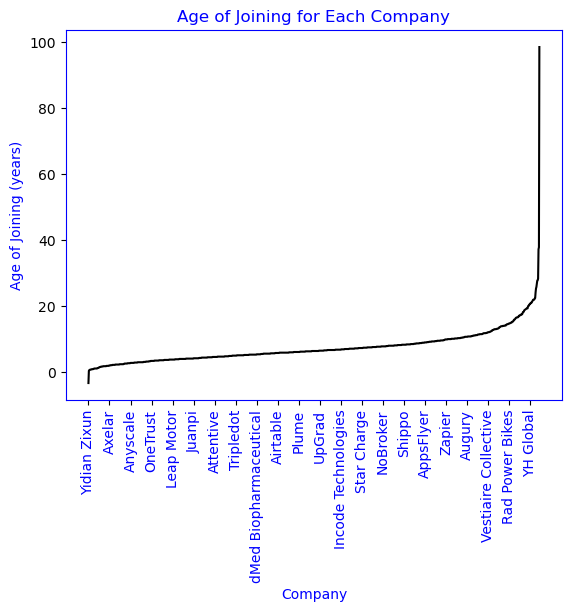

In [53]:
import matplotlib.pyplot as plt


# Assuming you have the DataFrame 'df' with the 'Company' and 'Age of Joining' columns

# Group the data by 'Company' and calculate the sum of 'Age of Joining'
age_of_joining = df.groupby('Company')['Age of Joining'].sum()

# Sort the values in ascending order
age_of_joining = age_of_joining.sort_values()

# Create a line chart with black color
plt.plot(age_of_joining.values, color='black')
plt.xlabel('Company', color='blue')  # Set the x-axis label color to blue
plt.ylabel('Age of Joining (years)', color='blue')  # Set the y-axis label color to blue
plt.title('Age of Joining for Each Company', color='blue')  # Set the title color to blue

# Adjust x-axis labels to show every 50th company
plt.xticks(range(0, len(age_of_joining), 50), age_of_joining.index[::50], rotation=90, color='blue')  # Set the x-axis label color to blue

# Set the text color to blue
plt.gca().spines['bottom'].set_color('blue')
plt.gca().spines['top'].set_color('blue')
plt.gca().spines['left'].set_color('blue')
plt.gca().spines['right'].set_color('blue')

# Display the chart
plt.show()


### Observation
 From the chat above  it shows that base On average, it takes 7 years for a company to become unicorn . The maximum time for a company to become unicorn is 98 years.And the minimum years is 4 years for a company to become a unicorn to reach a valuation of $1 billion.


## 2.  Which unicorn companies have had the biggest return on investment?

In [36]:
# Filter the data to only include companies with known funding amounts
df = df[df['Funding'].notnull()]

# Calculate the ROI for each company
df['ROI'] = df['Valuation'] / df['Funding']

# Sort the companies by ROI and get the top 10
top_10_roi_companies = df.sort_values(by='ROI', ascending=False).head(10)

# Print the result
print("Top 10 Unicorn Companies with the biggest return on investment and their funding value:")
for i, row in top_10_roi_companies.iterrows():
    print(f"{i+1}. {row['Company']}: {row['Valuation']} ({row['Funding']})")

Top 10 Unicorn Companies with the biggest return on investment and their funding value:
425. Uplight: 2000000000.0 (0.0)
1003. Poizon: 1000000000.0 (0.0)
734. DistroKid: 1000000000.0 (0.0)
946. Iodine Software: 1000000000.0 (0.0)
948. Kendra Scott: 1000000000.0 (0.0)
718. Veepee: 1000000000.0 (0.0)
190. Otto Bock HealthCare: 4000000000.0 (0.0)
216. SSENSE: 4000000000.0 (0.0)
568. ISN: 2000000000.0 (0.0)
640. SITECH DEV: 1000000000.0 (0.0)


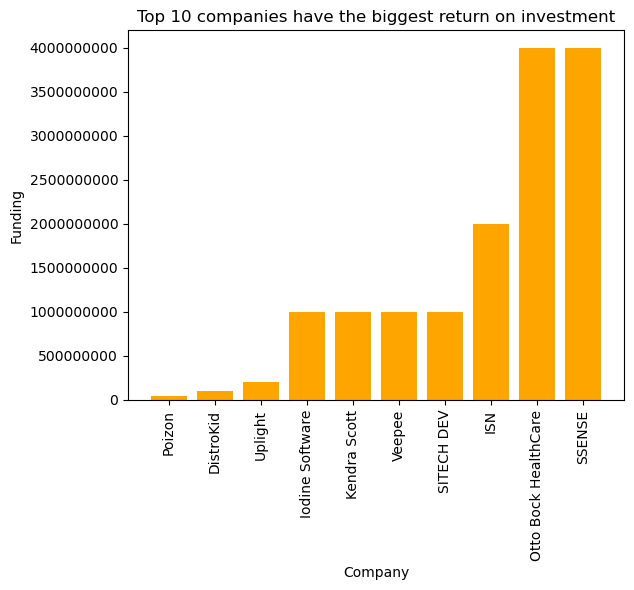

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {'Company': ['Uplight', 'Poizon', 'DistroKid', 'Iodine Software', 'Kendra Scott', 'Veepee', 'Otto Bock HealthCare', 'SSENSE', 'ISN', 'SITECH DEV'],
        'Funding': [200000000.0, 40000000.0, 100000000.0, 1000000000.0, 1000000000.0, 1000000000.0, 4000000000.0, 4000000000.0, 2000000000.0, 1000000000.0]}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Sort the DataFrame by funding in descending order
df = df.sort_values(by='Funding', ascending=True)

# Create a bar chart of the funding values with orange color
plt.bar(df['Company'], df['Funding'], color='orange')

# Add labels and a title
plt.xlabel('Company')
plt.ylabel('Funding')
plt.title('Top 10 companies have the biggest return on investment')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Remove the funding value label
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()


### Observation
Out of the Top 10 companies,it shows that SSENSE and Otto Bock HealthCare Unicon Company had the biggest return on investment with 4000000000$

## 3.  Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

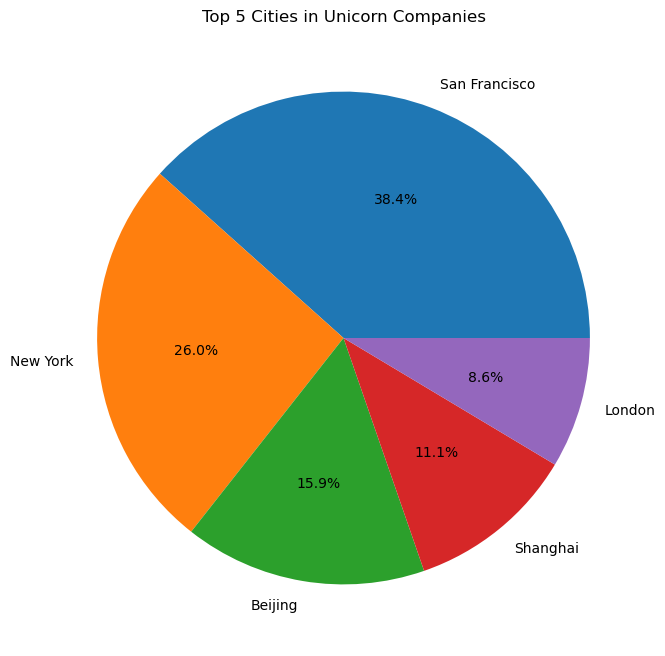

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Unicorn Companies Dataset\Unicorn_Companies.csv", encoding='utf-8')

# Get the top 5 cities
top_cities = df['City'].value_counts().head(5)

# Create a pie chart with a larger size
plt.figure(figsize=(8, 8))  # Increase the figure size to 8x8

# Create the pie chart
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%')

# Set the title
plt.title('Top 5 Cities in Unicorn Companies')

# Display the chart
plt.show()


### OBSERVATION

###### San Francisco is the city with the most number of unicorns with the total value of 37.8%, which are located in the United State of America . folow by New York with 26.0%,Beijing with value of 15.9%, Shanghai with the value of 11.1%, London City is  the last with 8.6%.


## 4.  Which investors have funded the most unicorns

In [15]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Unicorn Companies Dataset\Unicorn_Companies.csv", encoding='utf-8')

# Count the occurrences of each investor and select the top investors
top_investors = df['Select Investors'].value_counts().head(10)

# Display the top investors
print(top_investors)


Select Investors
Sequoia Capital                                                                                3
Pelion Venture Partners, Foundation Capital, Thoma Bravo                                       2
Insight Partners, Sequoia Capital, Index Ventures                                              2
Speedinvest, Valar Ventures, Uniqa Ventures                                                    2
SoftBank Group                                                                                 2
Shunwei Capital Partners, China Media Group, Guangzhou Huiyin Aofeng Equity Investment Fund    2
General Atlantic                                                                               2
Qualcomm Ventures, Accel, Canaan Partners                                                      2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings                               2
Global Founders Capital, Shea Ventures, Greycroft                                              2
Name: count, 

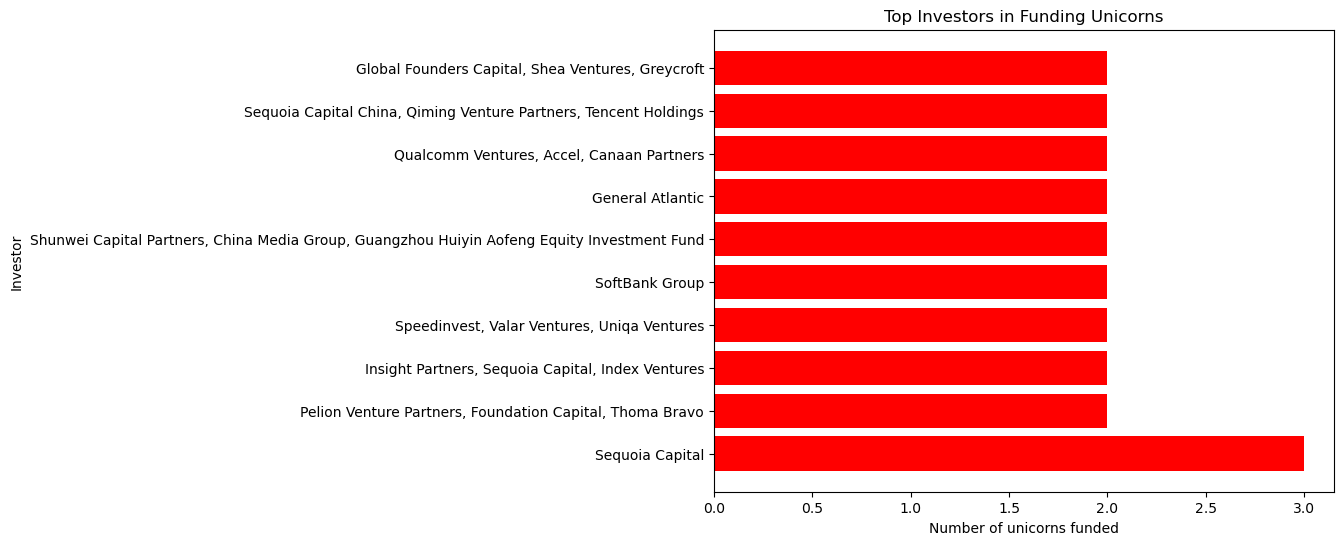

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\Unicorn Companies Dataset\Unicorn_Companies.csv", encoding='utf-8')

# Count the occurrences of each investor and select the top investors
top_investors = df['Select Investors'].value_counts().head(10)

# Create a horizontal bar chart with a larger size
plt.figure(figsize=(8, 6))  # Increase the figure size to 8x6

# Create the horizontal bar chart with red color
plt.barh(top_investors.index, top_investors.values, color='red')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Number of unicorns funded')
plt.ylabel('Investor')
plt.title('Top Investors in Funding Unicorns')

# Display the chart
plt.show()


### OBSERVATION
Sequoia Capital is a venture capital firm based in Menlo Park California, it funded the most unicorns out of the Top 10 investors.

# Recommendation

1. The USA and San Francisco have produced the most unicorns,and when you're experiencing rapid growth in your business with an influx of new customers,you should have the right systems, such as CRM, to capture their contacts and foster relationships so they'll buy from you again.Remember that acquiring a customer costs morethan selling to an existing customer.

2. Having the right staff that fits your culture and lives by your core values will step up when needed to serve all your customers.

3. If the office is too hot or too cold, the workers will be negatively impacted. People are not at their best and cannot
work optimally when the temperature is not conducive. A good air conditioning system will help to regulate the temperature 
of the office so as to help workers give their best.

4. Partnering with other companies can help unicorn companies expand their reach and generate more revenue.